In [80]:
import numpy as np # pour les maths
import matplotlib.pyplot as plt # pour charger et afficher les images
from skimage import data, io, exposure, filters, util

In [143]:
def display(imgs, width = 15):
    n = len(imgs)
    if n == 1:
        plt.imshow(imgs[0][0], cmap="gray")
        plt.title(imgs[0][1])
        plt.show()
        return
    
    nrows = 1 + (n-1) // 3
    ncols = min(n, 3)

    fig_height = width / ncols * nrows * 0.8
    fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (width, fig_height))

    if nrows == 1:
        for i, (img, title) in enumerate(imgs):
            axs[i].imshow(img, cmap="gray")
            axs[i].set_title(title)
            axs[i].axis("off")

    else:
        for idx, (img, title) in enumerate(imgs):
            i, j = divmod(idx, 3)
            axs[i][j].imshow(img, cmap="gray")
            axs[i][j].set_title(title)
            axs[i][j].axis("off")

    plt.tight_layout(pad=4)
    plt.show()

In [126]:
def apply(X, func):
    Xs = X.copy()
    w, h, *_ = np.shape(X)
    for i in range(w):
        for j in range(h):
            Xs[i][j] = func(Xs[i][j])
    return Xs

### Exercice 1. Filtres de Sobel

1. Charger l'image `lena.pgm`, la stocker dans une variable `lena` et la normaliser.

In [32]:
lena = plt.imread("lena.pgm")
lena = util.img_as_float(lena) # normalize

2. Lui appliquer les filtres de convolutions `sobel_h()` et `sobel_v()` . Afficher les deux images `lena_h` et `lena_v` obtenues.

In [33]:
lena_h = filters.sobel_h(lena)
lena_v = filters.sobel_v(lena)

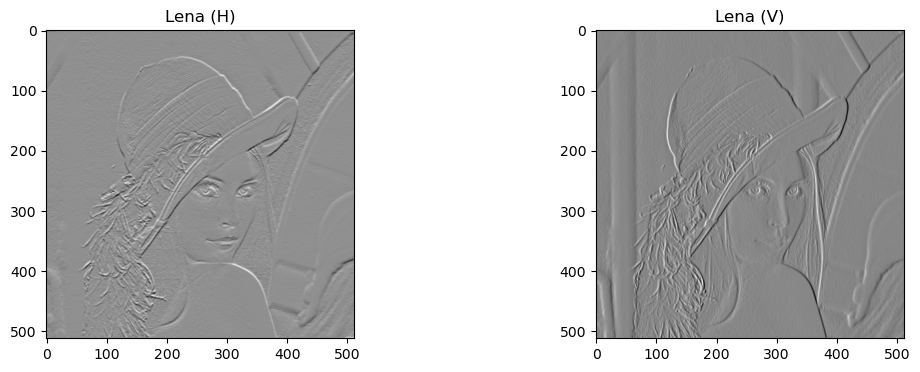

In [127]:
display2([(lena_h, "Lena (H)"), (lena_v, "Lena (V)")])

3. Écrire une fonction `grad(I)` en Python qui calcule le module du gradient obtenu à partir des convolutions $I_x = I \times \text{Sobel\_h}$ et $I_y = I \times \text{Sobel\_v}$.

In [83]:
def grad(I, filter1 = filters.sobel_h, filter2 = filters.sobel_v):
    I1, I2 = filter1(I), filter2(I)
    return np.sqrt(I1**2 + I2**2)

4. Afficher l'image obtenue.

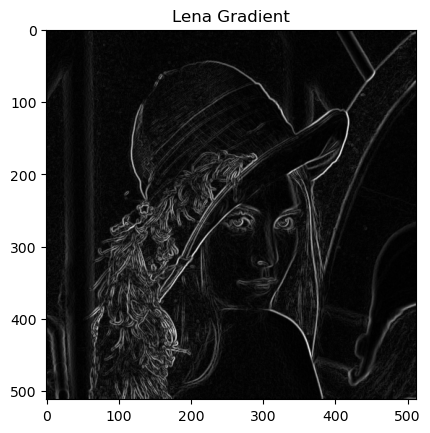

In [86]:
lena_grad = grad(lena)
display([(lena_grad, "Lena Gradient")])

### Exercice 2. Seuillage

1. Afficher l'histogramme obtenu avec l'exercice précédent.

In [92]:
def histo(image):
    _, ax = plt.subplots(figsize = (15,4))
    hist, _ = exposure.histogram(image)
    ax.plot(hist)

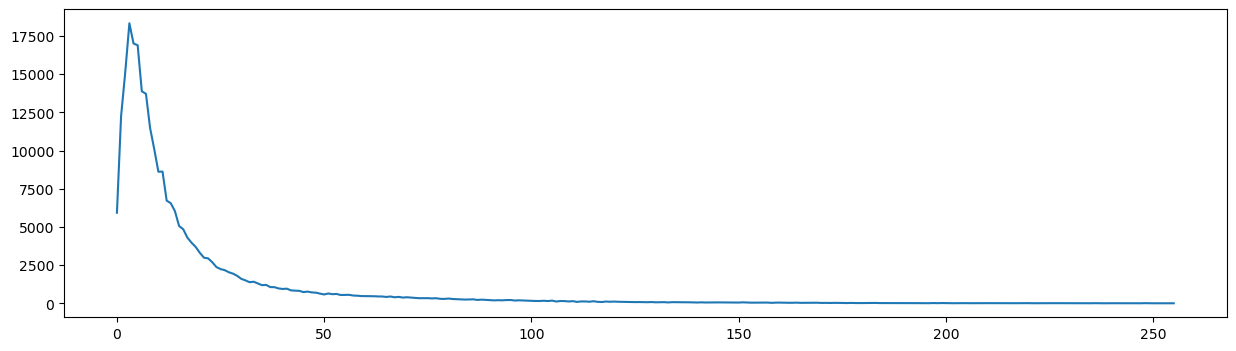

In [93]:
histo(lena_grad)

2. Proposer une valeur de seuillage pour mettre en valeur les contours obtenus.
3. Afficher l'image obtenue.

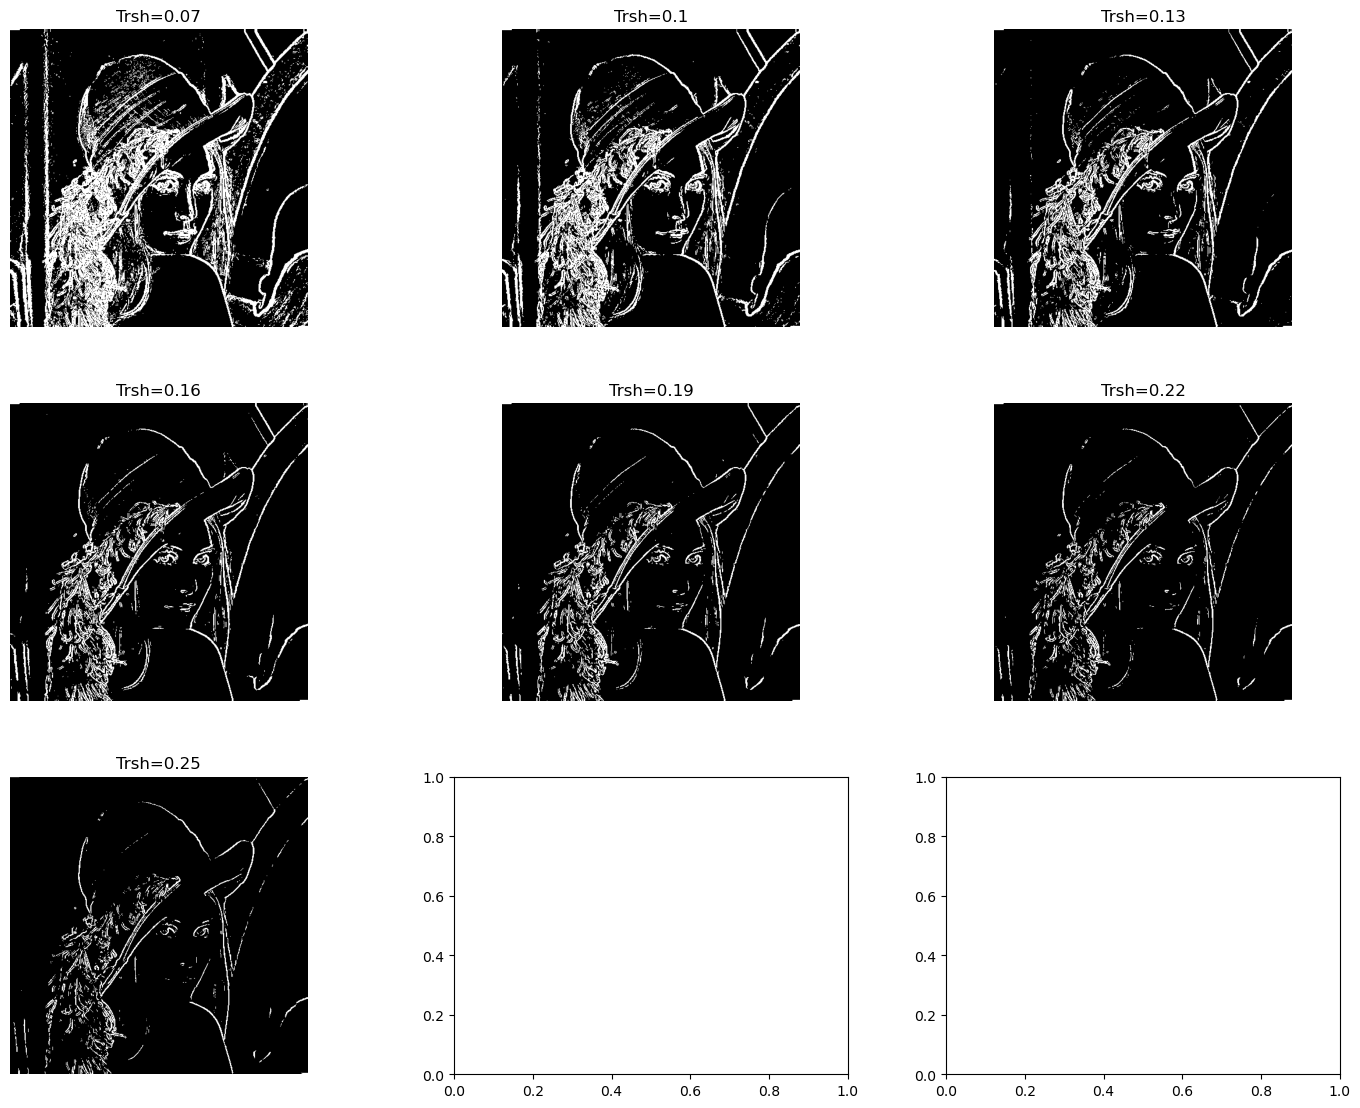

In [152]:
tests = reversed([i/100 for i in range(25, 5, -3)])
display([(apply(lena_grad, lambda x: int(x > test)), f"Trsh={test}") for test in tests])

Le meilleur seuil a l'air d'être aux alentours de 0,15.

### Exercice 3. Segmentation

1. Ouvrir l'image `coins.pgm`, la stocker dans une matrice `X`. Afficher l'image.

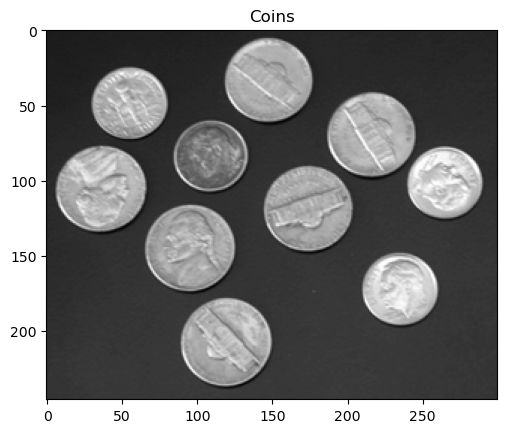

In [135]:
X = plt.imread("coins.pgm")
display([(X, "Coins")])

2. Tracer l’histogramme de l’image et identifier les différents pics de l’histogramme.
Quelles sont les zones correspondant au fond ? aux pièces ?

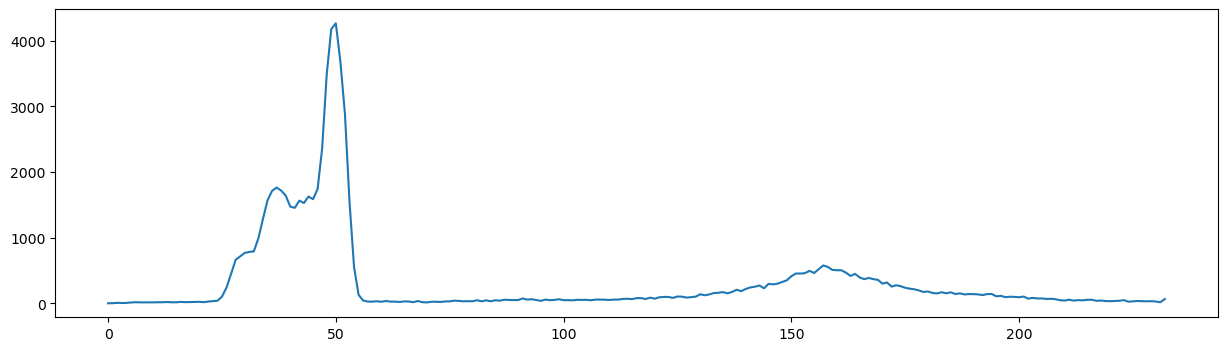

In [136]:
histo(X)

        50 a l'air d'être le fond, on retrouve les ombres en dessous, et les pièces sont aux alentours de 160.

3. En observant l’histogramme, déterminer les seuils $T_{min}$ et $T_{max}$ à utiliser.

Nous avons une grande plage possible pour $T_{min}$, qui pourrait être n'importe où entre 60 et 130 sans grande importance. Quant à $T_{max}$, il devrait être à 255.

4. Créer une fonction `Xbin = bin1(X, Tmin, Tmax)` qui retourne une image binaire booléenne $X_{bin}$ de même taille que $X$ , valant 255 pour les pixels de $X$ compris entre $T_{min}$ et $T_{max}$ et 0 sinon. La zone correspondant au fond sera donc noire, et les zones correspondant aux pièces seront blanches. Afficher $X$ et $X_{bin}$ sur la même figure.

In [137]:
def bin1(X, Tmin, Tmax):
    return apply(X, lambda x : 255 if Tmin <= x <= Tmax else 0)

5. Tester plusieurs valeurs de $T_{min}$ et $T_{max}$ jusqu’à avoir une segmentation de bonne qualité.

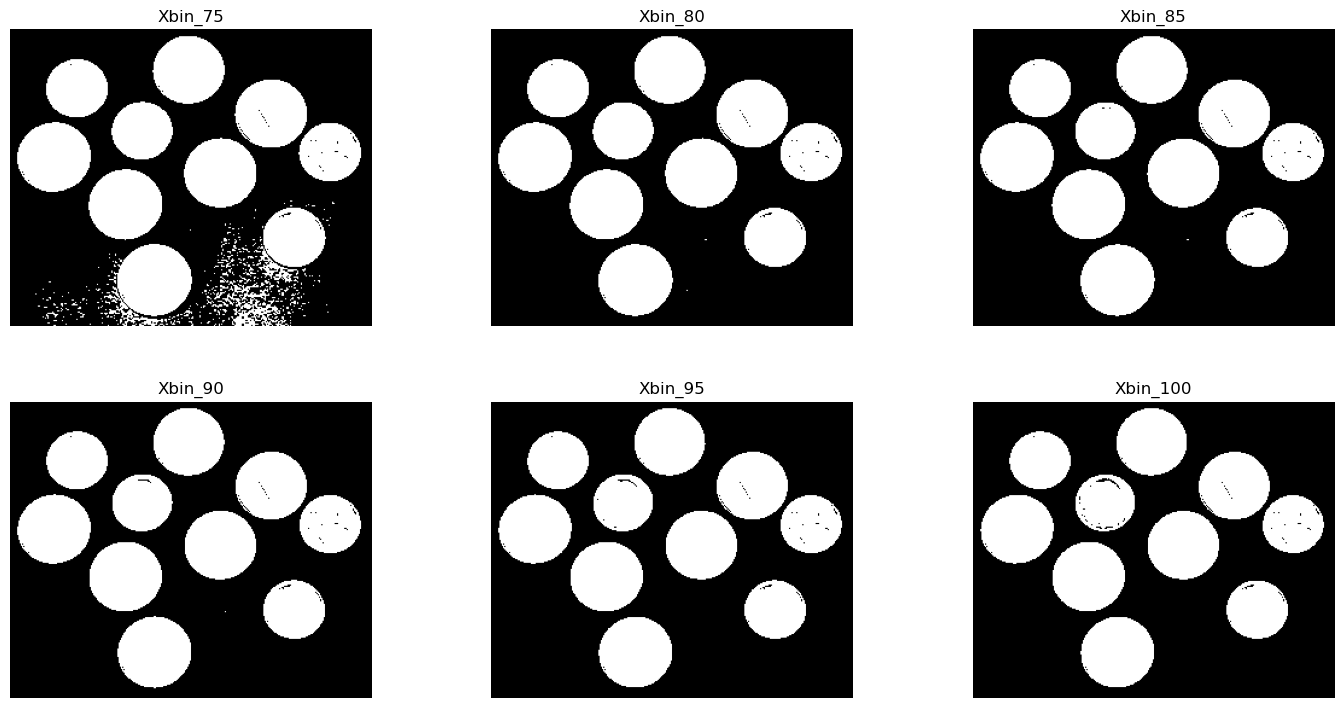

In [150]:
Tmins = [i for i in range(75, 101, 5)]
display([
    (bin1(X, Tmin, 255), f"Xbin_{Tmin}") for Tmin in Tmins
])

80 a l'air d'être le meilleur seuil.

In [153]:
Xbin = bin1(X, 80, 255)

6. S’il reste des points isolés qui ne sont pas de la bonne couleur, on peut appliquer un filtrage médian sur l’image $X_{bin}$.

In [154]:
Xseg = filters.median(Xbin)

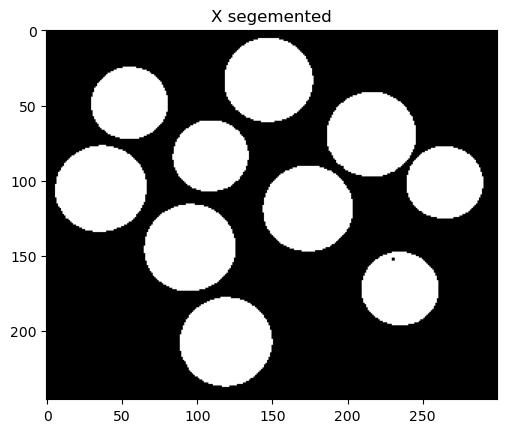

In [155]:
display([(Xseg, "X segemented")])

### Exercice 4. Segmentation pour détection de contours

1. Ouvrir l’image `coins.pgm`, la stocker dans une matrice `Y`.

In [156]:
Y = X.copy()

2. Appliquer la fonction `grad` de l’exercice 1 pour déterminer le gradient `Y1` de `Y`.

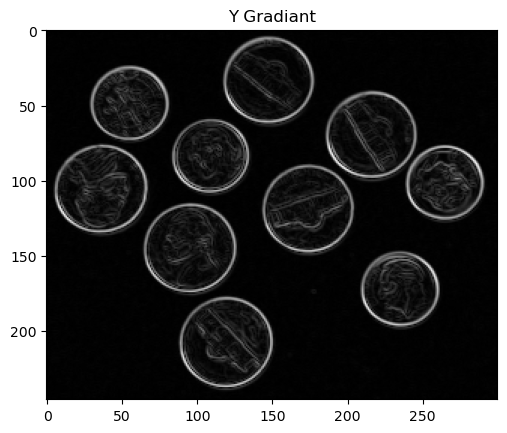

In [157]:
Y_grad = grad(Y)
display([(Y_grad, "Y Gradiant")])

3. Tracer l’histogramme de `Y1` afin de déterminer le seuil `T` à utiliser.

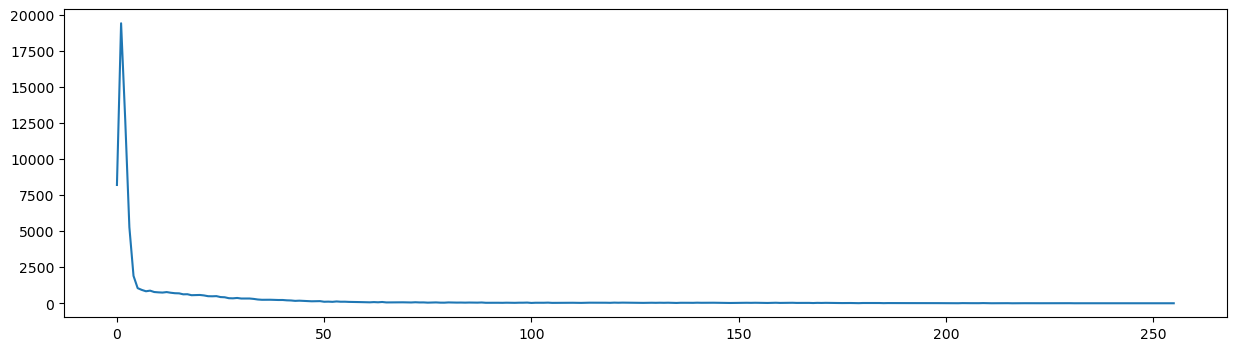

In [158]:
histo(Y_grad)

4. Créer fonction `Ybin = bin2(Y, T)` qui retourne une image $Y_{bin}$ de même taille que $Y$ valant 255 pour les pixels de $Y_1$ supérieurs à $T$ et 0 sinon. Les contours des pièces seront donc blancs et tout le reste de l’image sera noir. Afficher $X$ et $Y_{bin}$ sur la même figure.

In [ ]:
def bin2(Y, T):
    apply()